In [1]:
import numpy as np
import scipy as sp
from graphs_utils import generate_graphs_for_data, plot_pdf_cdf, plot_prob_cdf

# My modules
from generator import Generator

In [2]:
gen = Generator(12345)

## Binomial Distribution

When $X$ has a \textbf{Binomial distribution}, it describes the number of \textit{successes} $k$ in $n$ independent trials, where each trial has a success probability $p$.

$$
X \sim \text{Bin}(n, p)
$$

The PMF is:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad \text{for } k = 0, 1, 2, \dots, n
$$

The CDF is:

$$
F_X(x) =
\begin{cases}
0, & x < 0 \\
\sum\limits_{k = 0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1 - p)^{n - k}, & 0 \leq x < n \\
1, & x \geq n
\end{cases}
$$

The expected value:

$$
\mathbb{E}X = np 
$$

The variance:

$$
\operatorname{Var}(X) = np(1-p)
$$

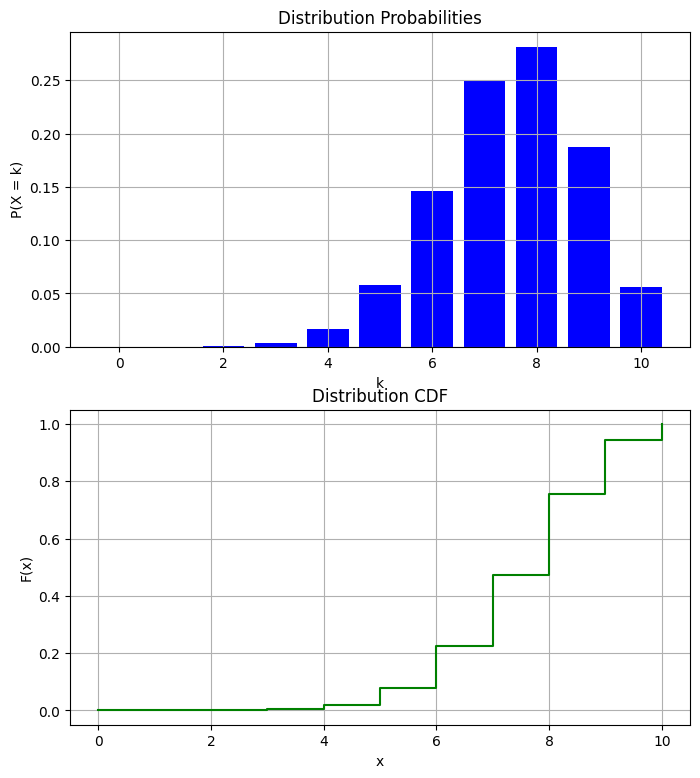

In [19]:
def prob_bin(k, n, p):
    return sp.special.comb(n, k) * p ** k * (1 - p) ** (n - k)


def F_bin(x, n, p):
    x = np.asarray(x, dtype=int)
    y = np.zeros_like(x, dtype=float)
    for i, xi in enumerate(x):
        y[i] = sum(prob_bin(k, n, p) for k in range(0, xi + 1))
    return y


plot_prob_cdf(prob_bin, F_bin, (10, .75), (10, .75), np.array([x for x in range(0, 10 + 1)]),
              np.array([x for x in range(0, 10 + 1)]))

In [4]:
binomial_values = np.array([gen.next_from_binomial(10, .75) for _ in range(0, 100_000)])

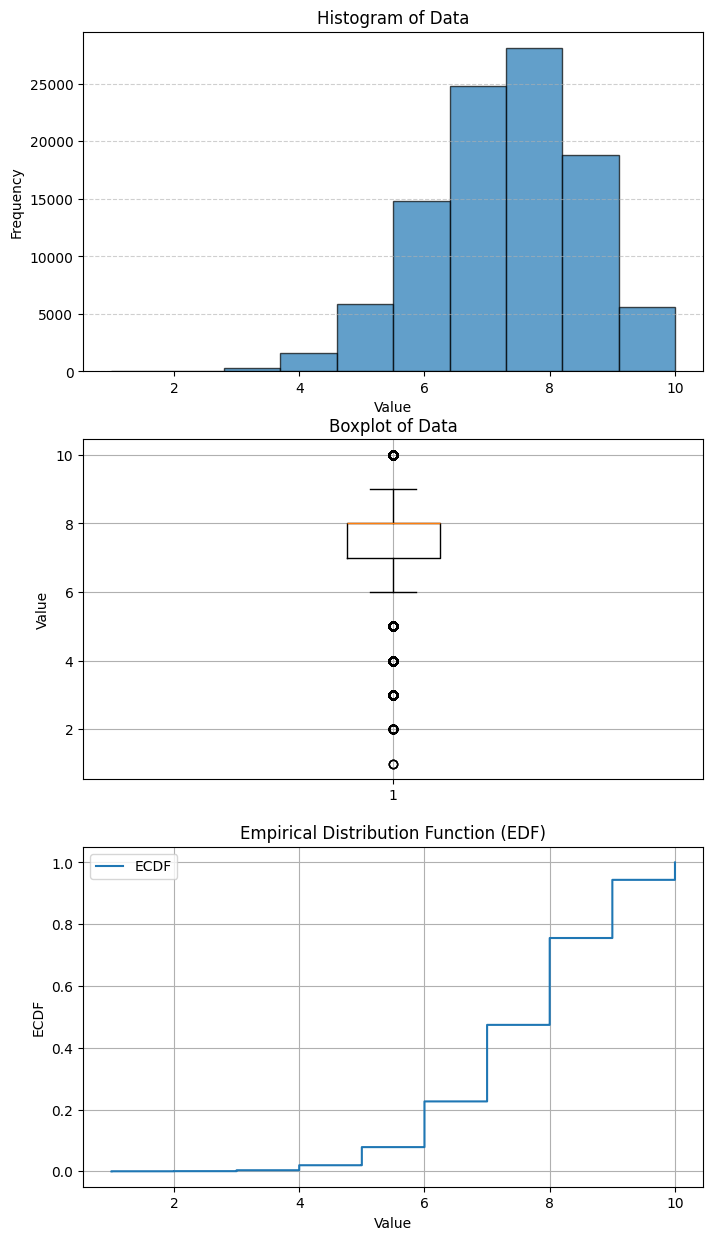

In [5]:
generate_graphs_for_data(binomial_values, hist_bins=10)

## Geometric Distribution

When $X$ has a \textbf{Geometric distribution}, number of unsuccessful before the first success with probability of being unsuccessful p.

$$
X \sim \text{Geo}(p)
$$

The PMF is:

$$
P(X = k) = p^k (1 - p), \quad \text{for } k = 0, 1, 2, \dots
$$

The CDF is:

$$
F_X(x) =
\begin{cases}
0, & x < 0 \\
\sum\limits_{k = 0}^{\lfloor x \rfloor} p^k (1 - p) = 1 - p^{\lfloor x \rfloor + 1}, & 0 \leq x
\end{cases}
$$

The expected value:

$$
\mathbb{E}X = \frac{1-p}{p} 
$$

The variance:

$$
\operatorname{Var}(X) = \frac{1-p}{p^2}
$$

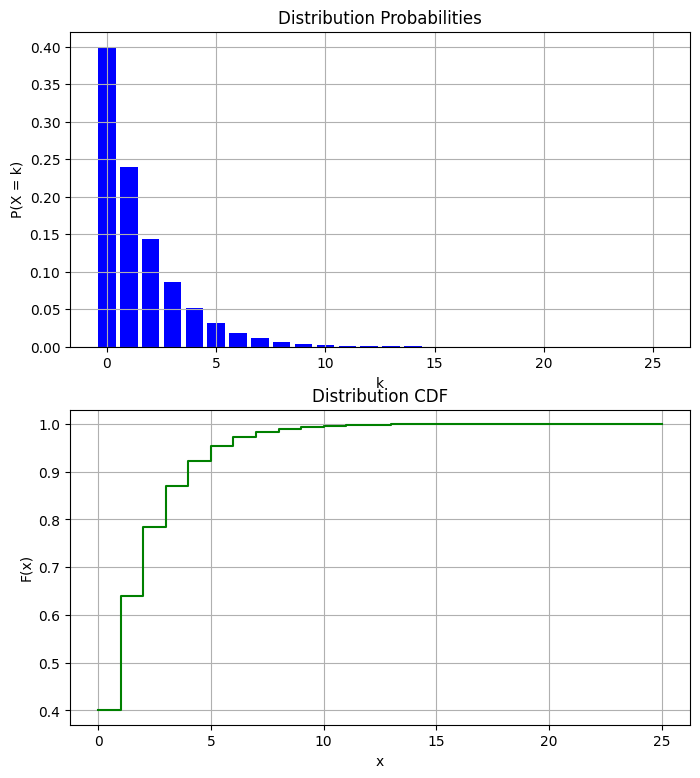

In [6]:
def prob_geo(k, p):
    return (1 - p) ** k * p


def F_geo(x, p):
    x = np.asarray(x, dtype=int)
    y = np.zeros_like(x, dtype=float)
    for i, xi in enumerate(x):
        y[i] = sum(prob_geo(k, p) for k in range(0, xi + 1))
    return y


plot_prob_cdf(prob_geo, F_geo, (.4,), (.4,), np.array([x for x in range(0, 25 + 1)]),
              np.array([x for x in range(0, 25 + 1)]))

In [7]:
geometric_values = np.array([gen.next_from_geometric(.4) for _ in range(0, 100_000)])

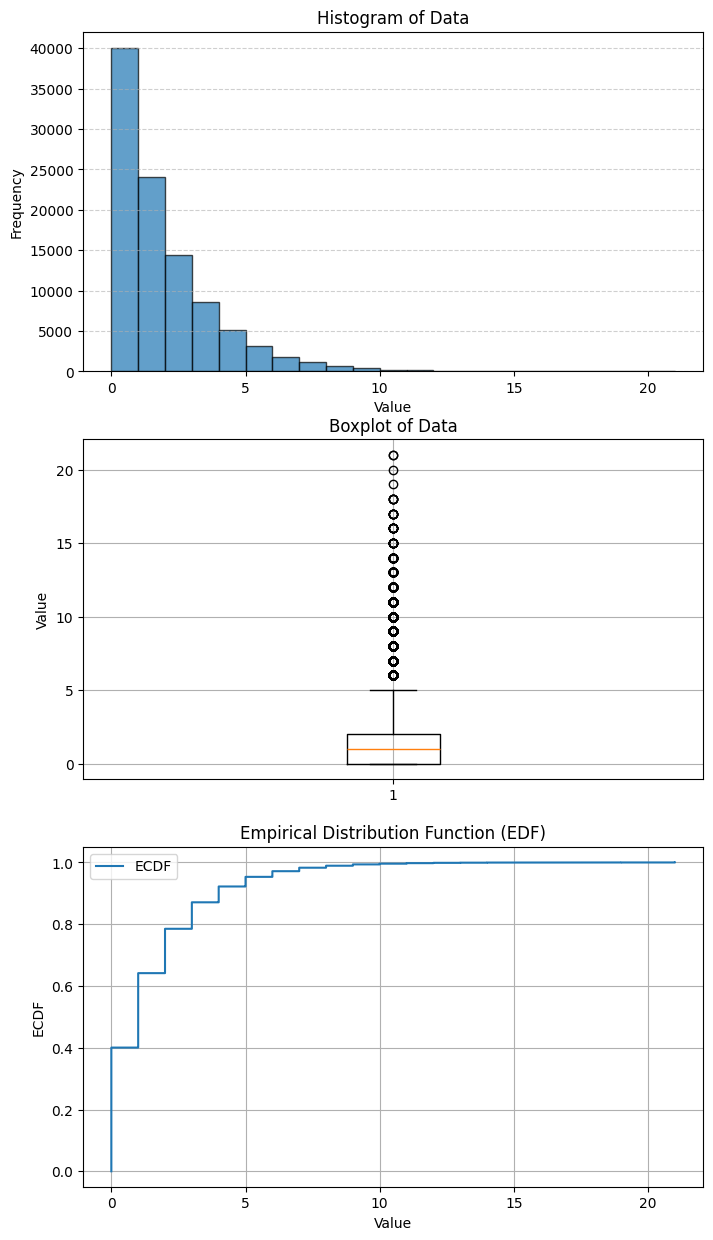

In [8]:
generate_graphs_for_data(geometric_values, hist_bins='auto')

## Geometric Distribution

When $X$ has a \textbf{Poisson distribution}, number of happenings in a time interval.

$$
X \sim \text{Po}(\lambda)
$$

The PMF is:

$$
P(X = k) = e^{-\lambda} \frac{\lambda^k}{k!}, \quad \text{for } k = 0, 1, 2, \dots
$$

The CDF is:

$$
F_X(x) =
\begin{cases}
0, & x < 0 \\
\sum\limits_{k = 0}^{\lfloor x \rfloor} e^{-\lambda} \frac{\lambda^k}{k!}, & 0 \leq x
\end{cases}
$$

The expected value:

$$
\mathbb{E}X = \lambda 
$$

The variance:

$$
\operatorname{Var}(X) = \lambda
$$

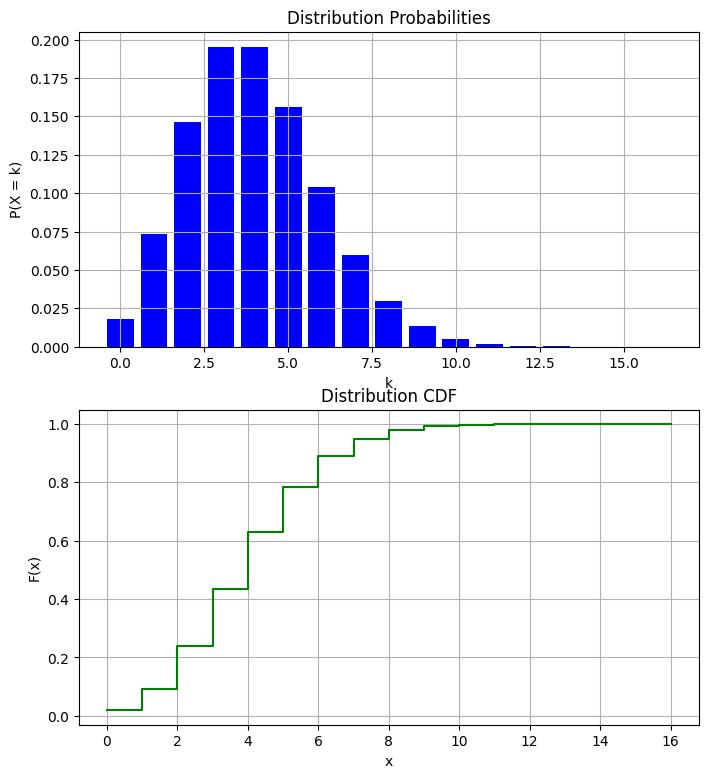

In [9]:
def prob_po(k, lmbda):
    return (lmbda ** k) * (np.exp(-lmbda)) / (sp.special.factorial(k))


def F_po(x, lmbda):
    x = np.asarray(x, dtype=int)
    y = np.zeros_like(x, dtype=float)
    for i, xi in enumerate(x):
        y[i] = sum(prob_po(k, lmbda) for k in range(0, xi + 1))
    return y


plot_prob_cdf(prob_po, F_po, (4,), (4,), np.array([x for x in range(0, 16 + 1)]),
              np.array([x for x in range(0, 16 + 1)]))

In [10]:
poisson_values = np.array([gen.next_from_poisson(4) for _ in range(0, 100_000)])

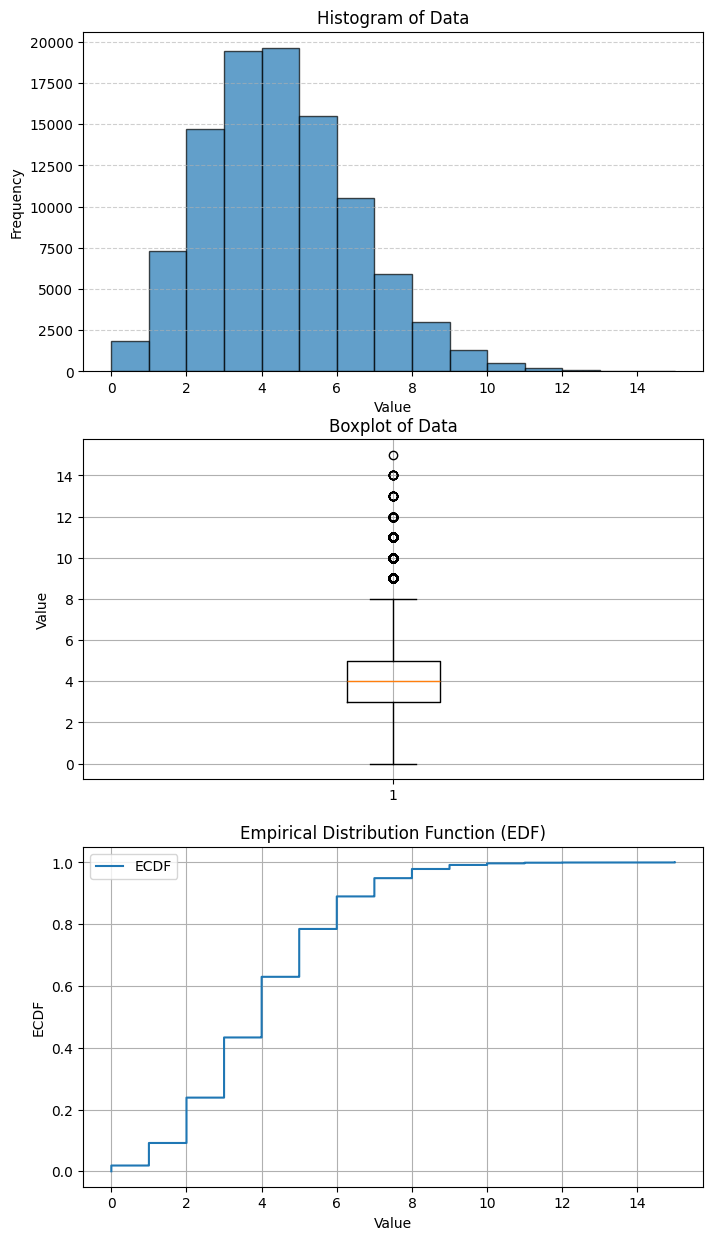

In [11]:
generate_graphs_for_data(poisson_values, hist_bins='auto')

## Uniform Distribution

When $X$ has a \textbf{Uniform distribution}, is number from interval <a,b>. Each number from the interval has equal probability.

$$
X \sim \text{U}(a, b)
$$

The PDF is:

$$
f_X(x) = 
\begin{cases}
0, & x \notin [a, b] \\
\frac{1}{b - a}, & x \in [a, b]
\end{cases}
$$

The CDF is:

$$
F_X(x) =
\begin{cases}
0, & x < a \\
\int_a^x \frac{1}{b - a} \, dt = \frac{x - a}{b - a}, & a \leq x \leq b \\
1, & x > b
\end{cases}
$$

The expected value:

$$
\mathbb{E}X = \frac{a + b}{2}
$$

The variance:

$$
\operatorname{Var}(X) = \frac{(a-b)^2}{12}
$$

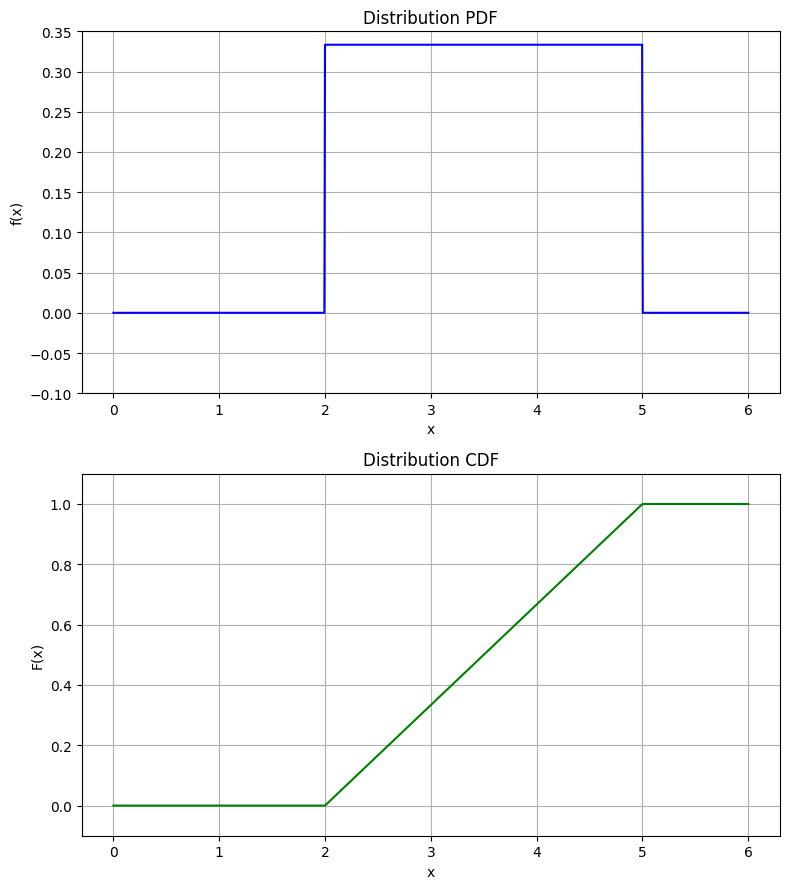

In [12]:
def f_uniform(x, a, b):
    y = np.zeros_like(x)
    mask = (x >= a) & (x <= b)
    y[mask] = 1 / (b - a)
    return y


def F_uniform(x, a, b):
    x = np.asarray(x, dtype=float)
    y = np.zeros_like(x)

    y[x > b] = 1
    in_range = (x >= a) & (x <= b)
    y[in_range] = (x[in_range] - a) / (b - a)

    return y


plot_pdf_cdf(f_uniform, F_uniform, (2, 5), (2, 5), np.linspace(0, 6, 1000), np.linspace(0, 6, 1000))

In [13]:
uniform_values = np.array([gen.next_double_from_to(2, 5) for _ in range(0, 100_000)])

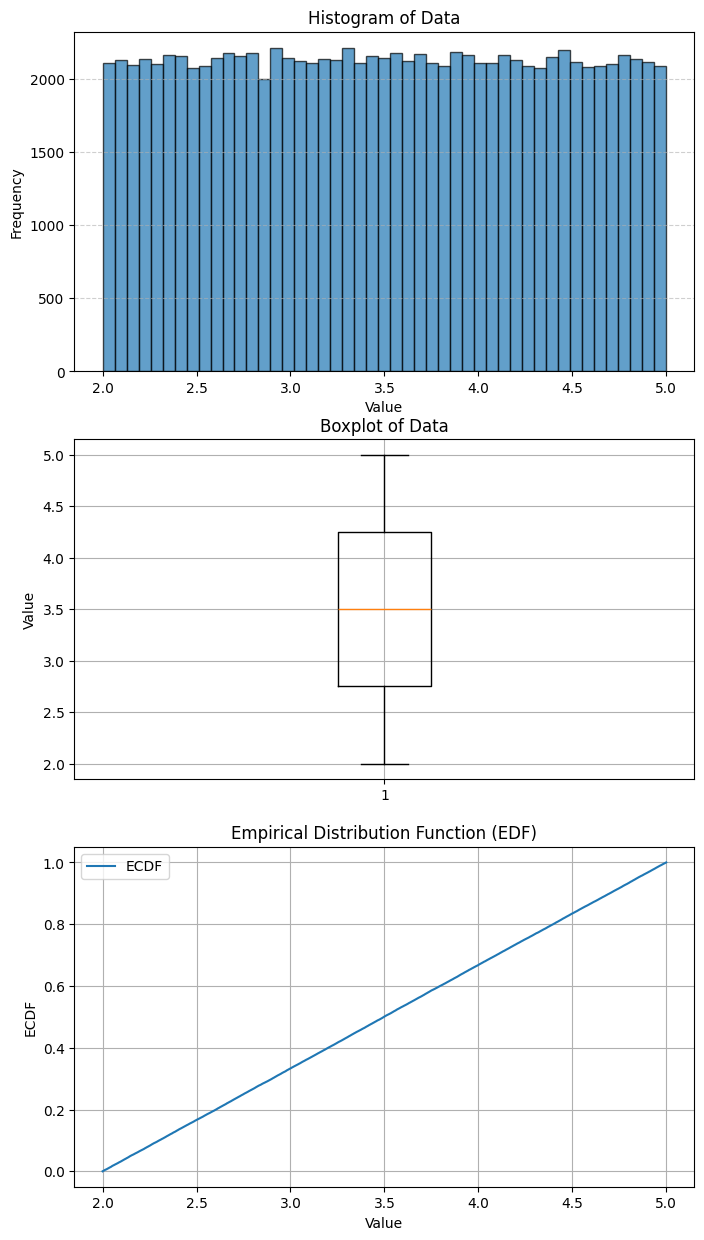

In [14]:
generate_graphs_for_data(uniform_values, hist_bins='auto')

## Normal Distribution

When $X$ has a Normal Distribution:
$X \sim \text{N}(\mu, \sigma^2)$:

The PDF is:

$$
f_X(x) = \frac{1}{\sqrt{2\pi} \, \sigma} \, e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

The CDF is:

$$
F_X(x) = \int_{-\infty}^x f_X(x) dx
$$

and cannot be analytically solved.

For $Y \sim \text{N}(0, 1)$:
$$
F_X(x) = \phi(x) \\
\phi(-x) = 1-\phi(x)
$$

The values of $\phi(x)$ are derived numerically.

The expected value:

$$
\mathbb{E}X = \mu
$$

The variance:

$$
\operatorname{Var}(X) = \sigma^2
$$

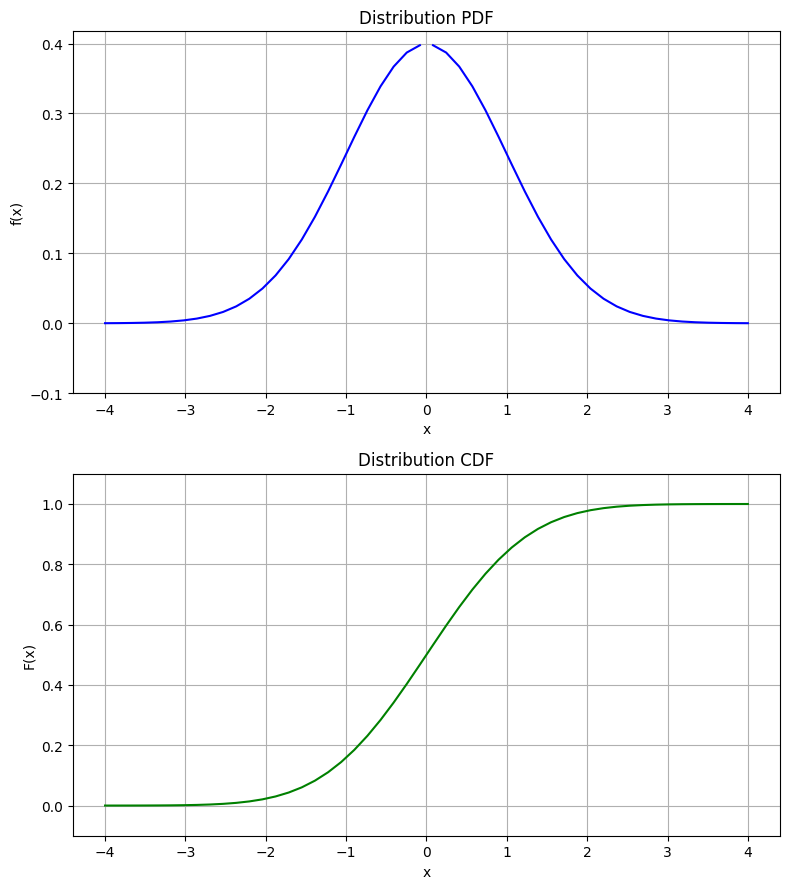

In [20]:
def f_norm(x, mu, sigma):
    return np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / np.sqrt(2 * np.pi * sigma ** 2)


def F_norm(x, mu, sigma):
    x = np.asarray(x)
    return np.array([sp.integrate.quad(f_norm, float('-inf'), xi, args=(mu, sigma))[0] for xi in x])

plot_pdf_cdf(f_norm, F_norm, (0, 1), (0, 1), np.linspace(-4, 4), np.linspace(-4, 4))

In [26]:
normal_values = np.array([gen.next_from_normal() for _ in range(0, 100_000)])

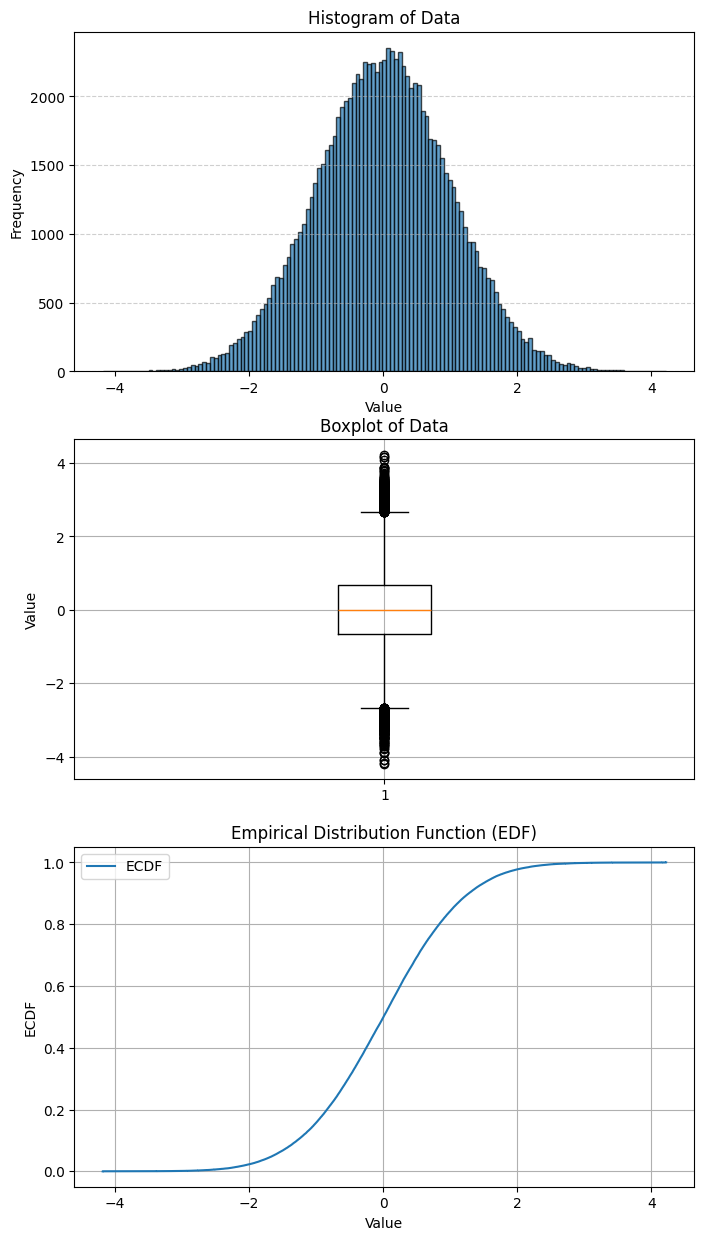

In [27]:
generate_graphs_for_data(normal_values, hist_bins='auto')

## Exponential Distribution

When $X$ has a Exponential Distribution:
$X \sim \text{Exp}(\lambda)$:

The PDF is:

$$
f_X(x) = 
\begin{cases}
0, & x \lt 0 \\
\lambda e^{-\lambda x}, & x \geq 0 \\
\end{cases}
$$

The CDF is:

$$
F_X(x) = 
\begin{cases}
0, & x \lt 0 \\
1 - e^{-\lambda x}, & x \geq 0 \\
\end{cases}
$$

The expected value:

$$
\mathbb{E}X = \frac{1}{\lambda}
$$

The variance:

$$
\operatorname{Var}(X) = \frac{1}{\lambda^2}
$$

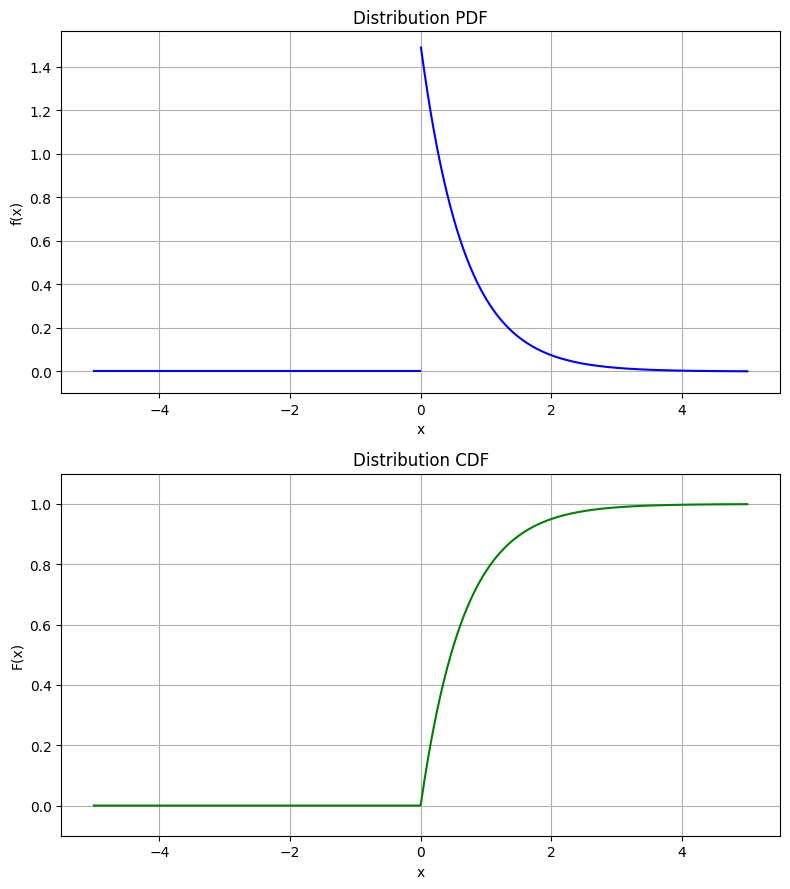

In [29]:
def f_exp(x, lmbda):
    y = np.zeros_like(x)
    mask = x >= 0
    y[mask] = lmbda * np.exp(-lmbda * x[mask])
    return y


def F_exp(x, lmbda):
    y = np.zeros_like(x)
    mask = x >= 0
    y[mask] = 1 - np.exp(-lmbda * x[mask])
    return y


plot_pdf_cdf(f_exp, F_exp, (1.5,), (1.5,), np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))

In [22]:
random_exp_values = np.array([gen.next_from_exp(1.5) for _ in range(0,100_000)])

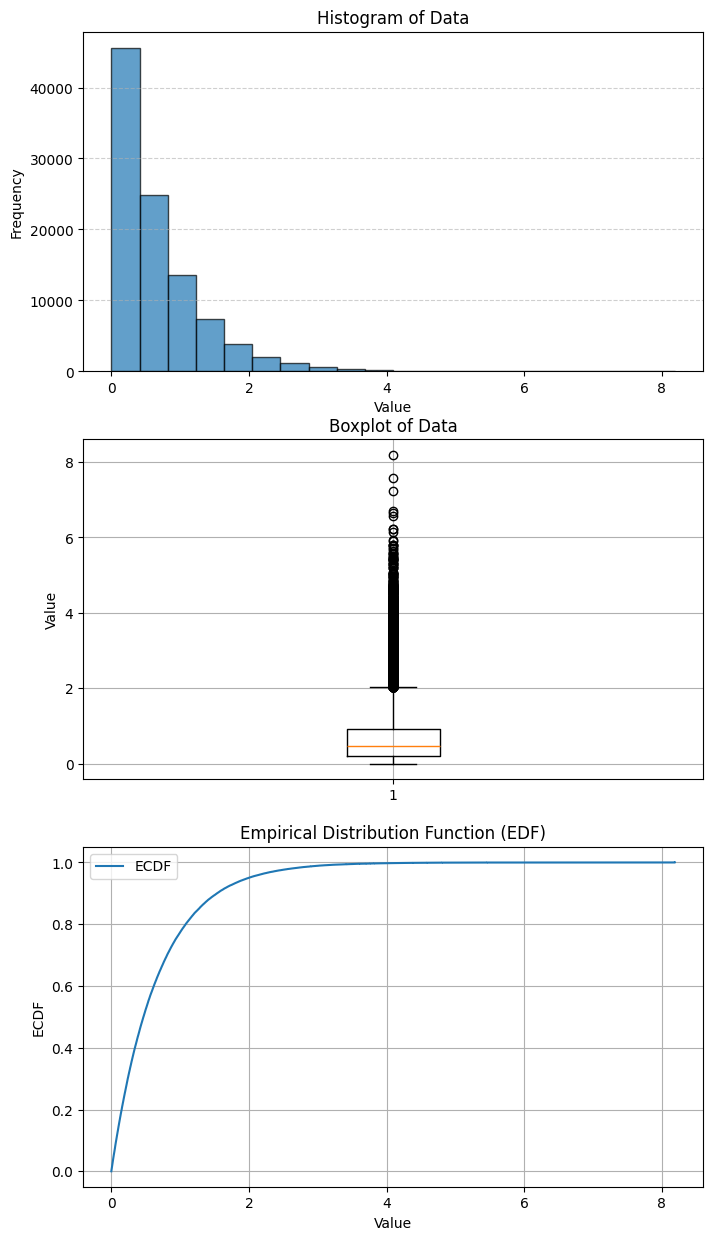

In [23]:
generate_graphs_for_data(random_exp_values)